# Spatial Analysis

Using examples from 
- http://pysal.org/notebooks/viz/splot/esda_morans_viz.html
- http://darribas.org/gds15/content/labs/lab_06.html

In [1]:
import matplotlib.pyplot as plt
from libpysal.weights.contiguity import Queen
from libpysal import examples
import numpy as np
import pandas as pd
import geopandas as gpd
import os
import splot

In [2]:
import sys
sys.path.insert(0, '../src/data')
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import bame_datastore

Found local clean copy of ethnicity_2011
Found local clean copy of Local_Authority_Districts__December_2009__Boundaries
Found local clean copy of BAME_report_cases
Found local clean copy of BAME_report_deaths
Found local clean copy of bame_excess_deaths
Found local clean copy of ons_deaths
Found local clean copy of furlough_data
Found local clean copy of key_workers


In [3]:
bame_datastore.lib

{'mortality': ['fbook_covid_data',
  'bame_rpt_deaths',
  'bame_rpt_excess_deaths',
  'ons_deaths'],
 'explanatory': ['ethnicity_data',
  'bame_rpt_cases',
  'furlough_data',
  'key_workers'],
 'other': ['lad_geog']}

In [4]:
df= pd.read_csv("../data/processed/explain_pop_norm.csv", index_col=0)
df = bame_datastore.fbook_covid_data.df
gdf = bame_datastore.lad_geog.gdf.set_index("lad09nm")
gdf = gdf.join(df)

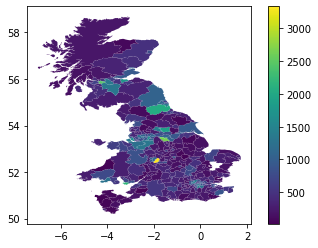

In [35]:
death_col = df.columns[-1]
gdf = gdf.dropna(subset=[death_col])
gdf.plot(column=death_col, cmap='viridis', legend=True)

In [13]:
y = gdf[death_col].values
w = Queen.from_dataframe(gdf)
w.transform = 'r'

('WARNING: ', 120, ' is an island (no neighbors)')


/Users/yusufsohoye/pythoncode/covid_bame/venv/lib/python3.7/site-packages/libpysal/weights/weights.py:167: UserWarning: The weights matrix is not fully connected: 
 There are 2 disconnected components.
 There is 1 island with id: 120.
  warnings.warn(message)


In [14]:
# spatial Autocorrelation

from esda.moran import Moran

w = Queen.from_dataframe(gdf)
moran = Moran(y, w)
moran.I

/Users/yusufsohoye/pythoncode/covid_bame/venv/lib/python3.7/site-packages/libpysal/weights/weights.py:167: UserWarning: The weights matrix is not fully connected: 
 There are 2 disconnected components.
 There is 1 island with id: 120.
  warnings.warn(message)


('WARNING: ', 120, ' is an island (no neighbors)')


0.35198261932127095

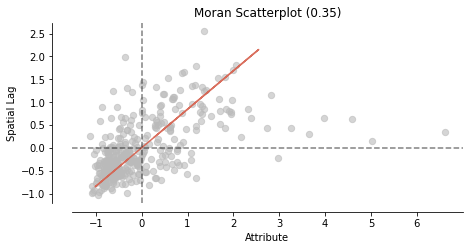

In [15]:
from splot.esda import moran_scatterplot
fig, ax = moran_scatterplot(moran, aspect_equal=True)
plt.show()

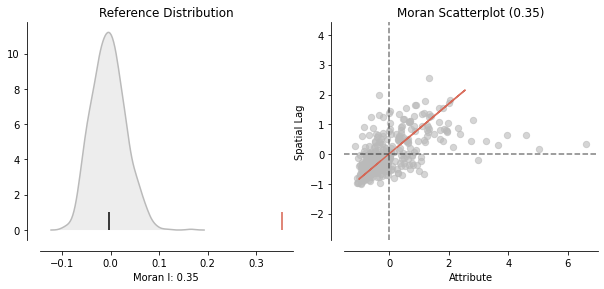

In [16]:
from splot.esda import plot_moran

plot_moran(moran, zstandard=True, figsize=(10,4))
plt.show()

In [17]:
moran.p_sim


0.001

/Users/yusufsohoye/pythoncode/covid_bame/venv/lib/python3.7/site-packages/esda/moran.py:886: RuntimeWarning: invalid value encountered in true_divide
  self.z_sim = (self.Is - self.EI_sim) / self.seI_sim
/Users/yusufsohoye/pythoncode/covid_bame/venv/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Users/yusufsohoye/pythoncode/covid_bame/venv/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/Users/yusufsohoye/pythoncode/covid_bame/venv/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1748: RuntimeWarning: invalid value encountered in greater_equal
  cond2 = (x >= self.b) & cond0


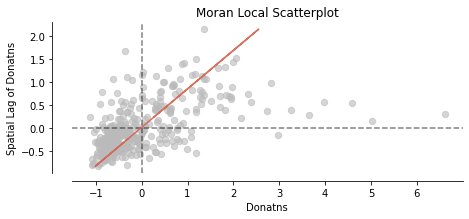

In [18]:
from splot.esda import moran_scatterplot
from esda.moran import Moran_Local

# calculate Moran_Local and plot
moran_loc = Moran_Local(y, w)
fig, ax = moran_scatterplot(moran_loc)
ax.set_xlabel('Donatns')
ax.set_ylabel('Spatial Lag of Donatns')
plt.show()


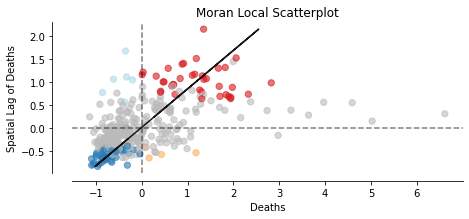

In [20]:
fig, ax = moran_scatterplot(moran_loc, p=0.05)
ax.set_xlabel('Deaths')
ax.set_ylabel('Spatial Lag of Deaths')
plt.show()

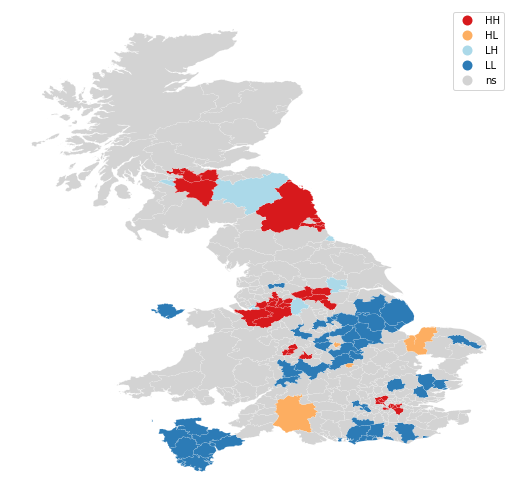

In [21]:
from splot.esda import lisa_cluster

lisa_cluster(moran_loc, gdf, p=0.05, figsize = (9,9))
plt.show()
